# Supervised Regression Algorithm Project

that is used to predict continuous values, such as house prices, 
stock prices, or customer churn1. Regression algorithms learn a function that maps from the input features to the output value. 


# Context

The Metro_Interstate_Traffic_Volume_dataset is a public dataset that contains hourly data on the traffic volume  and detail about the wether and tempreture

# project content:

Import Libraries

Import Dataset

Analysing Data

Transforming Data to required format (Using Mean,Median,Mode)

Label Encoding

Feature Scaling

# Apply Supervised Regression Algorithm

Simple Linear Regression

polynomial Regression

Ridge & Lasso Regression

Decision Tree Regression

Random forest Regression

MAE

MSE

RMSE

R_squared

# Import library

In [4]:
#import all library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# dataset

In [5]:
df=pd.read_csv("Metro_Interstate_Traffic_Volume_dataset (1).csv")
df

,traffic_volume,holiday,temp,rain_1h,clouds_all,weather_main,weather_description
0,5545.0,NaN,288.28,0.0,40.0,Clouds,scattered clouds
1,4516.0,NaN,289.36,0.0,75.0,Clouds,broken clouds
2,4767.0,NaN,289.58,0.0,90.0,Clouds,overcast clouds
3,5026.0,NaN,290.13,0.0,90.0,Clouds,overcast clouds
4,4918.0,NaN,291.14,0.0,75.0,Clouds,broken clouds
...,...,...,...,...,...,...,...
48199,3543.0,NaN,283.45,0.0,75.0,Clouds,broken clouds
48200,2781.0,NaN,282.76,0.0,90.0,Clouds,overcast clouds
48201,2159.0,NaN,282.73,0.0,90.0,Thunderstorm,proximity thunderstorm
48202,1450.0,NaN,282.09,0.0,90.0,Clouds,overcast clouds


In [6]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48195 non-null  float64
 1   holiday              61 non-null     object 
 2   temp                 48178 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   clouds_all           48191 non-null  float64
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
dtypes: float64(4), object(3)
memory usage: 2.6+ MB


In [7]:
df.shape

(48204, 7)

In [8]:
df.isnull().sum()

traffic_volume             9
holiday                48143
temp                      26
rain_1h                    0
clouds_all                13
weather_main               0
weather_description        0
dtype: int64

In [9]:
#List of traffic volume
df['traffic_volume'].value_counts()

traffic_volume
356.0     50
353.0     50
340.0     47
351.0     44
369.0     42
          ..
6843.0     1
6953.0     1
2585.0     1
7118.0     1
2346.0     1
Name: count, Length: 6704, dtype: int64

In [10]:
#List of temp
df['temp'].value_counts()

temp
274.150    128
275.150     89
274.080     85
276.793     78
291.150     73
          ... 
256.170      1
256.850      1
277.685      1
257.850      1
304.900      1
Name: count, Length: 5841, dtype: int64

In [11]:
#List of holiday
df['holiday'].value_counts()

holiday
Labor Day                    7
Thanksgiving Day             6
Christmas Day                6
New Years Day                6
Martin Luther King Jr Day    6
Columbus Day                 5
Veterans Day                 5
Washingtons Birthday         5
Memorial Day                 5
Independence Day             5
State Fair                   5
Name: count, dtype: int64

In [12]:
#List of clouds all
df['clouds_all'].value_counts()

clouds_all
90.0     16432
1.0      12761
75.0      5066
40.0      3993
0.0       1988
20.0      1849
64.0      1558
5.0       1094
92.0       776
12.0       273
8.0        270
24.0       186
32.0       185
88.0       183
80.0       181
48.0       180
68.0       179
36.0       169
56.0       166
76.0       153
44.0       147
100.0       94
99.0        44
93.0        34
98.0        21
87.0        18
85.0        17
59.0        16
96.0        14
57.0        13
89.0        13
91.0        12
81.0        11
46.0         9
97.0         8
77.0         7
6.0          6
63.0         5
11.0         5
83.0         5
16.0         5
25.0         4
70.0         4
58.0         4
72.0         3
13.0         3
3.0          3
4.0          3
2.0          2
50.0         2
62.0         2
67.0         2
42.0         2
86.0         2
38.0         2
60.0         2
54.0         2
84.0         1
17.0         1
78.0         1
Name: count, dtype: int64

# using heat map for checking the null vlue

<Axes: >

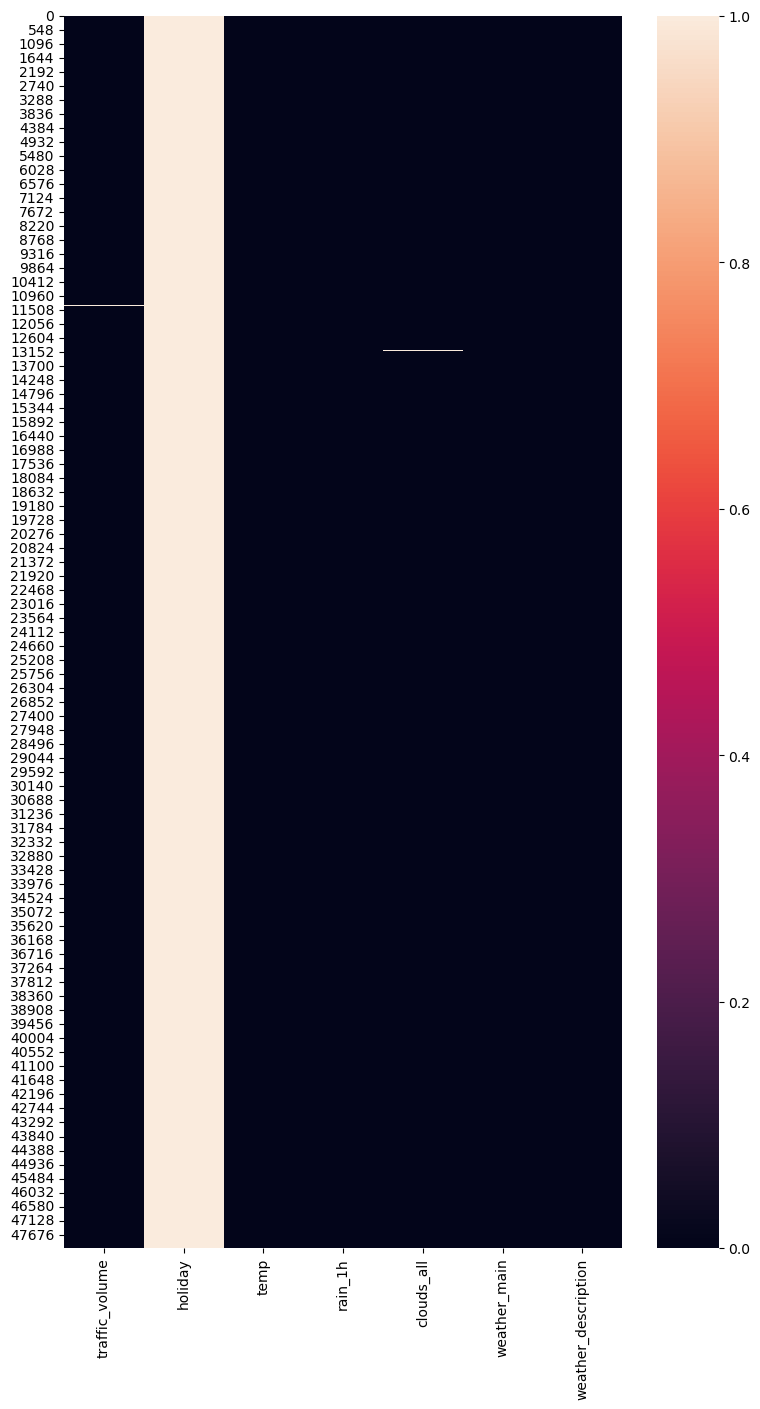

In [13]:
# heat map for int and float missing value
    
plt.figure(figsize=(9,16))
sns.heatmap(df.isnull())  

In [14]:
null_var=df.isnull().sum()/df.shape[0]*100
null_var


traffic_volume          0.018671
holiday                99.873454
temp                    0.053937
rain_1h                 0.000000
clouds_all              0.026969
weather_main            0.000000
weather_description     0.000000
dtype: float64

In [15]:
df1=df.select_dtypes(include=['int64','float64'])
df1.head()
#Now df1 contains all the numberical column

,traffic_volume,temp,rain_1h,clouds_all
0,5545.0,288.28,0.0,40.0
1,4516.0,289.36,0.0,75.0
2,4767.0,289.58,0.0,90.0
3,5026.0,290.13,0.0,90.0
4,4918.0,291.14,0.0,75.0


# there are total 4 column which has missing value

In [16]:
missing_num_var=[var for var in df.columns
                if df[var].isnull().sum()>0]
missing_num_var

['traffic_volume', 'holiday', 'temp', 'clouds_all']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9592\1900570949.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[var], bins=20,
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9592\1900570949.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[var], bins=20,
C:\Users\ADMIN\AppData\Local\Temp\

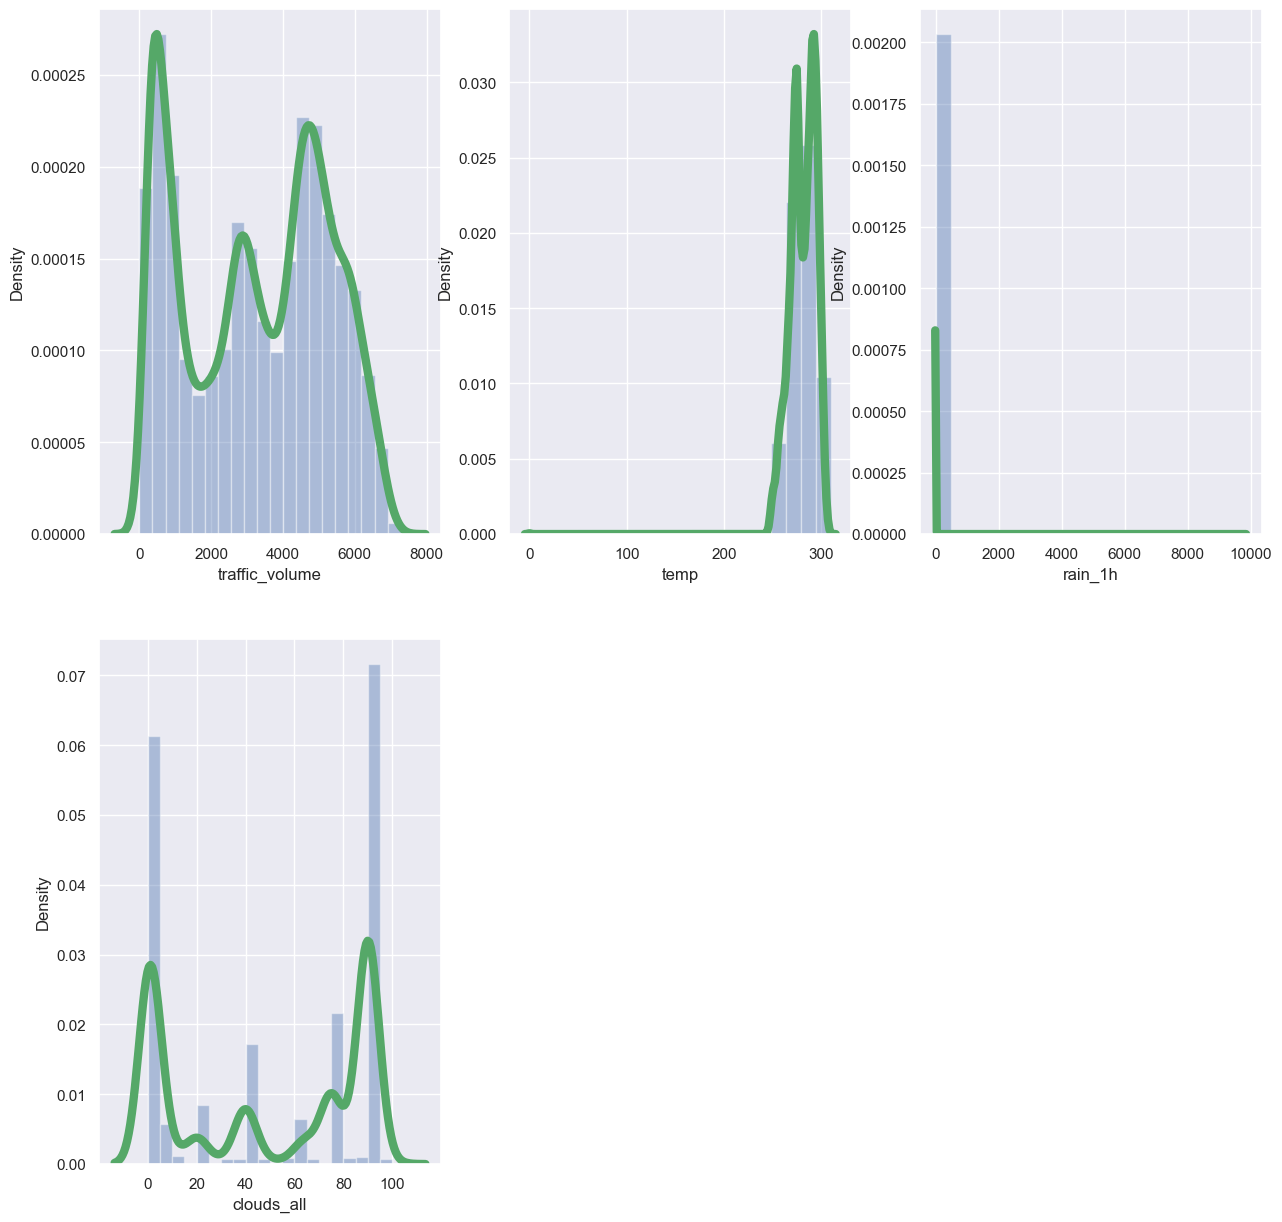

In [17]:
plt.figure(figsize=(15,15))
sns.set()
for i, var in enumerate(df1): 

    plt.subplot(2,3,i+1) 

    
    sns.distplot(df1[var], bins=20,
                 kde_kws={'linewidth':6, 'color':'g'})

In [18]:
df1_mean = df1.fillna(df1.mean()) 
#fillna() is used to fill missing values 
### now we fill it using mean

df1_mean.isnull().sum().sum()

0

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9592\1246823522.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original",) # original dataframe
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9592\1246823522.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

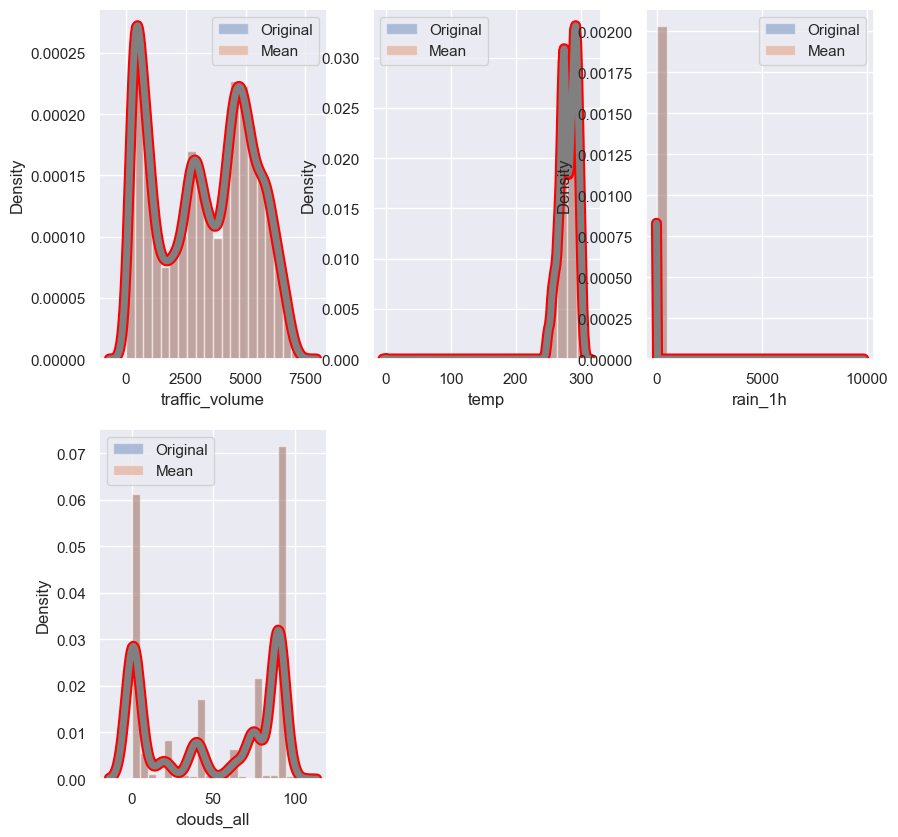

In [19]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(df1):
    plt.subplot(2,3,i+1)
    sns.distplot(df1[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original",) # original dataframe
    sns.distplot(df1_mean[var], bins=20, kde_kws={'linewidth':5, 'color':'grey'},label="Mean",)
    plt.legend()


In [20]:
df1_median = df1.fillna(df1.median())
df1_median.isnull().sum().sum()

0

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9592\1069202411.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[var], bins=20,hist=False, kde_kws={'linewidth':8, 'color':'red'}, label="Original",)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9592\1069202411.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

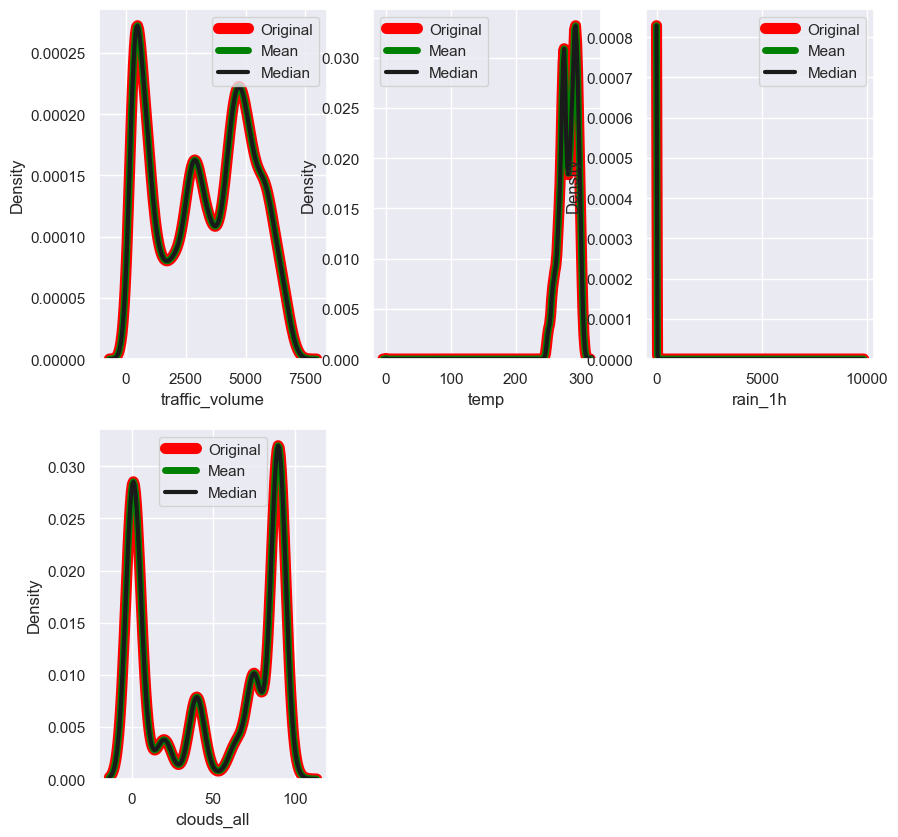

In [21]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(df1):
    plt.subplot(2,3,i+1)
    sns.distplot(df1[var], bins=20,hist=False, kde_kws={'linewidth':8, 'color':'red'}, label="Original",)
    sns.distplot(df1_mean[var], bins=20,hist=False, kde_kws={'linewidth':5, 'color':'green'},label="Mean",)
    sns.distplot(df1_median[var], bins=20,hist=False, kde_kws={'linewidth':3, 'color':'k'},label="Median",)
    plt.legend()

In [22]:
df.update(df1_median)
df

,traffic_volume,holiday,temp,rain_1h,clouds_all,weather_main,weather_description
0,5545.0,NaN,288.28,0.0,40.0,Clouds,scattered clouds
1,4516.0,NaN,289.36,0.0,75.0,Clouds,broken clouds
2,4767.0,NaN,289.58,0.0,90.0,Clouds,overcast clouds
3,5026.0,NaN,290.13,0.0,90.0,Clouds,overcast clouds
4,4918.0,NaN,291.14,0.0,75.0,Clouds,broken clouds
...,...,...,...,...,...,...,...
48199,3543.0,NaN,283.45,0.0,75.0,Clouds,broken clouds
48200,2781.0,NaN,282.76,0.0,90.0,Clouds,overcast clouds
48201,2159.0,NaN,282.73,0.0,90.0,Thunderstorm,proximity thunderstorm
48202,1450.0,NaN,282.09,0.0,90.0,Clouds,overcast clouds


<Axes: >

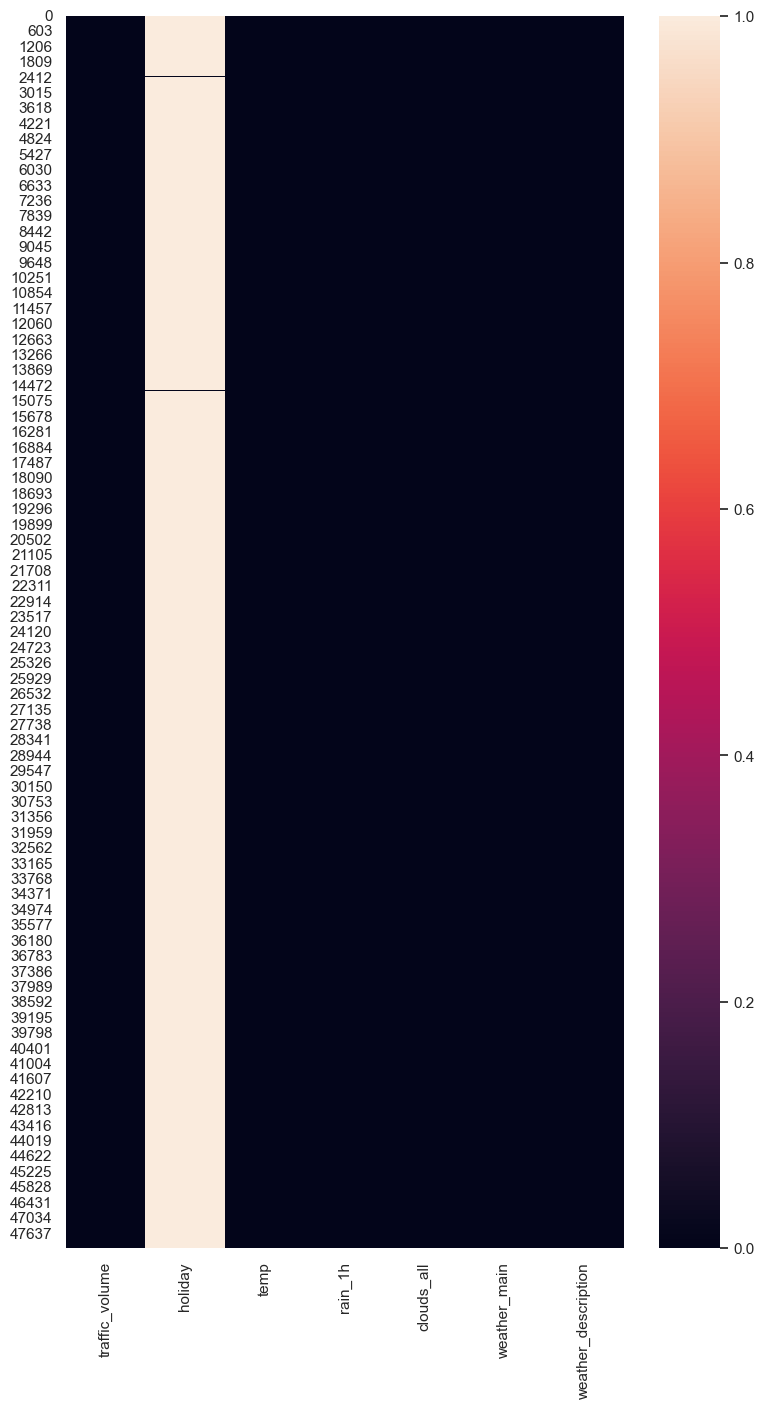

In [23]:
plt.figure(figsize=(9,16))
sns.heatmap(df.isnull())  
#here  we can see all the missing values are fill 

# now we will work on column holiday

Now select data type which has Object



In [24]:
holy_vars = df.select_dtypes(include='object')
holy_vars.head()

,holiday,weather_main,weather_description
0,NaN,Clouds,scattered clouds
1,NaN,Clouds,broken clouds
2,NaN,Clouds,overcast clouds
3,NaN,Clouds,overcast clouds
4,NaN,Clouds,broken clouds


<Axes: >

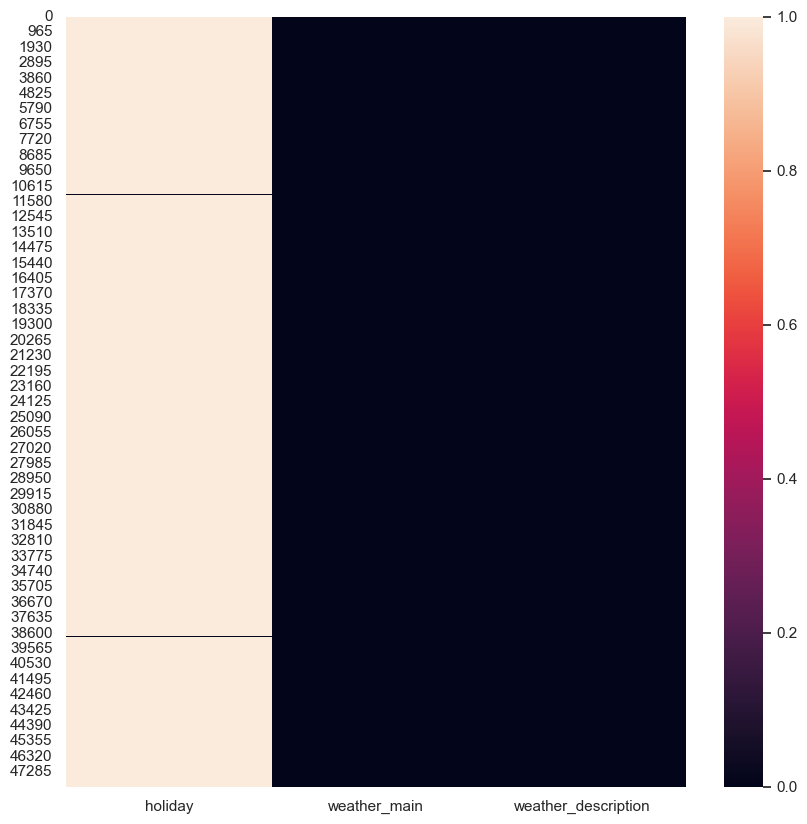

In [25]:
#Heatmap for object datatype missing value
plt.figure(figsize=(10,10))
sns.heatmap(holy_vars.isnull())

In [26]:
holy_vars.isnull().sum()

holiday                48143
weather_main               0
weather_description        0
dtype: int64

In [27]:
df2= holy_vars.isnull().mean()*100
df2

holiday                99.873454
weather_main            0.000000
weather_description     0.000000
dtype: float64

In [28]:
#fill HOLIDAY Values with mode
holy_vars['holiday'].value_counts()


holiday
Labor Day                    7
Thanksgiving Day             6
Christmas Day                6
New Years Day                6
Martin Luther King Jr Day    6
Columbus Day                 5
Veterans Day                 5
Washingtons Birthday         5
Memorial Day                 5
Independence Day             5
State Fair                   5
Name: count, dtype: int64

In [29]:
holy_vars['holiday'].mode()

0    Labor Day
Name: holiday, dtype: object

In [30]:
holy_vars['holiday'].fillna(holy_vars['holiday'].mode()[0])

0        Labor Day
1        Labor Day
2        Labor Day
3        Labor Day
4        Labor Day
           ...    
48199    Labor Day
48200    Labor Day
48201    Labor Day
48202    Labor Day
48203    Labor Day
Name: holiday, Length: 48204, dtype: object

In [31]:
holy_vars['holiday'].fillna(holy_vars['holiday'].mode()[0]).value_counts()

holiday
Labor Day                    48150
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: count, dtype: int64

In [32]:
holy_vars_copy= holy_vars.copy()

for var in holy_vars:
    holy_vars_copy[var].fillna(holy_vars[var].mode()[0],inplace=True)
    print(var,"=",holy_vars[var].mode()[0])

holiday = Labor Day
weather_main = Clouds
weather_description = sky is clear


In [33]:
holy_vars_copy.isnull().sum().sum()

0

In [34]:
df.update(holy_vars_copy)

In [35]:
df

,traffic_volume,holiday,temp,rain_1h,clouds_all,weather_main,weather_description
0,5545.0,Labor Day,288.28,0.0,40.0,Clouds,scattered clouds
1,4516.0,Labor Day,289.36,0.0,75.0,Clouds,broken clouds
2,4767.0,Labor Day,289.58,0.0,90.0,Clouds,overcast clouds
3,5026.0,Labor Day,290.13,0.0,90.0,Clouds,overcast clouds
4,4918.0,Labor Day,291.14,0.0,75.0,Clouds,broken clouds
...,...,...,...,...,...,...,...
48199,3543.0,Labor Day,283.45,0.0,75.0,Clouds,broken clouds
48200,2781.0,Labor Day,282.76,0.0,90.0,Clouds,overcast clouds
48201,2159.0,Labor Day,282.73,0.0,90.0,Thunderstorm,proximity thunderstorm
48202,1450.0,Labor Day,282.09,0.0,90.0,Clouds,overcast clouds


In [36]:
df.update(df1_mean)

df

,traffic_volume,holiday,temp,rain_1h,clouds_all,weather_main,weather_description
0,5545.0,Labor Day,288.28,0.0,40.0,Clouds,scattered clouds
1,4516.0,Labor Day,289.36,0.0,75.0,Clouds,broken clouds
2,4767.0,Labor Day,289.58,0.0,90.0,Clouds,overcast clouds
3,5026.0,Labor Day,290.13,0.0,90.0,Clouds,overcast clouds
4,4918.0,Labor Day,291.14,0.0,75.0,Clouds,broken clouds
...,...,...,...,...,...,...,...
48199,3543.0,Labor Day,283.45,0.0,75.0,Clouds,broken clouds
48200,2781.0,Labor Day,282.76,0.0,90.0,Clouds,overcast clouds
48201,2159.0,Labor Day,282.73,0.0,90.0,Thunderstorm,proximity thunderstorm
48202,1450.0,Labor Day,282.09,0.0,90.0,Clouds,overcast clouds


<Axes: >

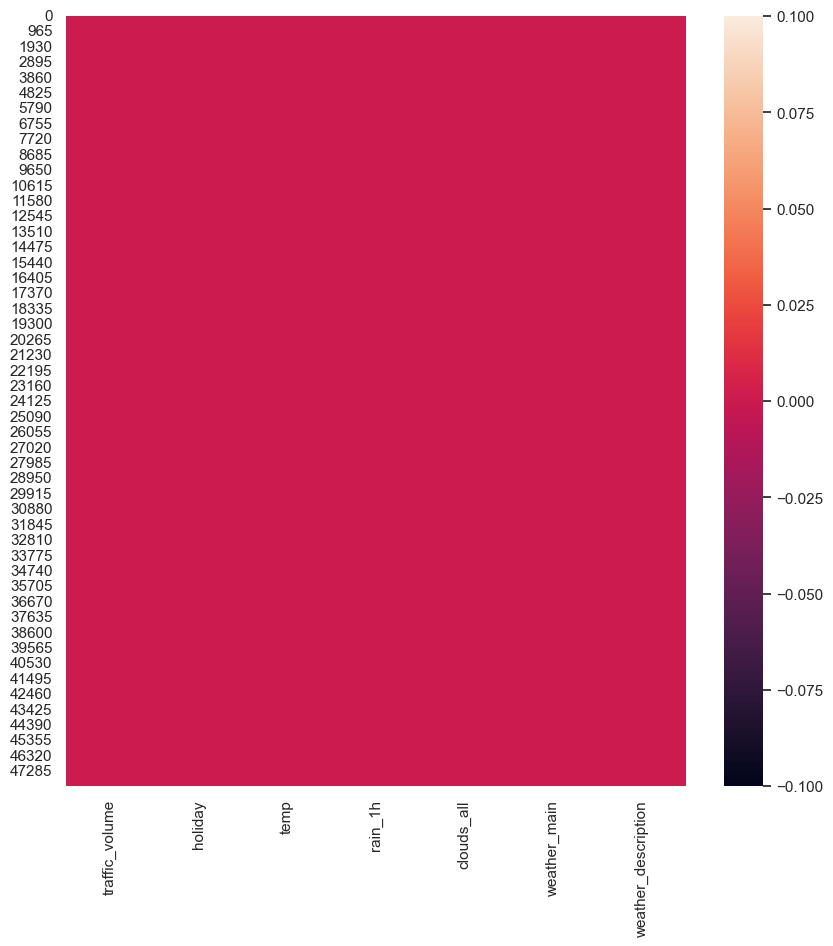

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())


In [38]:
df.isnull().sum()

traffic_volume         0
holiday                0
temp                   0
rain_1h                0
clouds_all             0
weather_main           0
weather_description    0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  float64
 1   holiday              48204 non-null  object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  float64
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
dtypes: float64(4), object(3)
memory usage: 2.6+ MB


# Apply Label  Encoder

In [40]:
df['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [41]:
df['holiday'].unique()

array(['Labor Day', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair',
       'Martin Luther King Jr Day'], dtype=object)

In [42]:
df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [43]:
#list of different'weather_description'
weather_description={
   'scattered clouds':0,
    'broken clouds':1, 
    'overcast clouds':2,
    'sky is clear':3, 
    'few clouds':4, 
    'light rain':5,
    'light intensity drizzle':6, 
    'mist':7,
    'haze':8,
    'fog':9,
    'proximity shower rain':10, 
    'drizzle':11,
    'moderate rain':12,
    'heavy intensity rain':13,
    'proximity thunderstorm':14,
    'thunderstorm with light rain':15,
    'proximity thunderstorm with rain':16,
    'heavy snow':17, 
    'heavy intensity drizzle':18, 
    'snow':19,
    'thunderstorm with heavy rain':20,
    'freezing rain':21, 
    'shower snow':22,
    'light rain and snow':23,
    'light intensity shower rain':24,
    'SQUALLS':25,
    'thunderstorm with rain':26, 
    'proximity thunderstorm with drizzle':27,
    'thunderstorm':28, 
    'Sky is Clear':29, 
    'very heavy rain':30,
    'thunderstorm with light drizzle':31, 
    'light snow':32,
    'thunderstorm with drizzle':33, 
    'smoke':34, 
    'shower drizzle':35,
    'light shower snow':36,
    'sleet':37
}

df['weather_description']=df['weather_description'].map(weather_description)

In [44]:
df

,traffic_volume,holiday,temp,rain_1h,clouds_all,weather_main,weather_description
0,5545.0,Labor Day,288.28,0.0,40.0,Clouds,0
1,4516.0,Labor Day,289.36,0.0,75.0,Clouds,1
2,4767.0,Labor Day,289.58,0.0,90.0,Clouds,2
3,5026.0,Labor Day,290.13,0.0,90.0,Clouds,2
4,4918.0,Labor Day,291.14,0.0,75.0,Clouds,1
...,...,...,...,...,...,...,...
48199,3543.0,Labor Day,283.45,0.0,75.0,Clouds,1
48200,2781.0,Labor Day,282.76,0.0,90.0,Clouds,2
48201,2159.0,Labor Day,282.73,0.0,90.0,Thunderstorm,14
48202,1450.0,Labor Day,282.09,0.0,90.0,Clouds,2


In [45]:
holiday={
    'Labor Day':0,
    'Columbus Day':1,
    'Veterans Day':2, 
    'Thanksgiving Day':3,
    'Christmas Day':4, 
    'New Years Day':5, 
    'Washingtons Birthday':6,
    'Memorial Day':7, 
    'Independence Day':8, 
    'State Fair':9,
    'Martin Luther King Jr Day':10
}
df['holiday']=df['holiday'].map(holiday)

In [46]:
df

,traffic_volume,holiday,temp,rain_1h,clouds_all,weather_main,weather_description
0,5545.0,0,288.28,0.0,40.0,Clouds,0
1,4516.0,0,289.36,0.0,75.0,Clouds,1
2,4767.0,0,289.58,0.0,90.0,Clouds,2
3,5026.0,0,290.13,0.0,90.0,Clouds,2
4,4918.0,0,291.14,0.0,75.0,Clouds,1
...,...,...,...,...,...,...,...
48199,3543.0,0,283.45,0.0,75.0,Clouds,1
48200,2781.0,0,282.76,0.0,90.0,Clouds,2
48201,2159.0,0,282.73,0.0,90.0,Thunderstorm,14
48202,1450.0,0,282.09,0.0,90.0,Clouds,2


In [47]:
weather_main={'Clouds':0,
              'Clear':1,
              'Rain':2, 
              'Drizzle':3,
              'Mist':4,
              'Haze':5,
              'Fog':6,
              'Thunderstorm':7,
              'Snow':8, 
              'Squall':9, 
              'Smoke':10
             }
df['weather_main']=df['weather_main'].map(weather_main)

In [48]:
df

,traffic_volume,holiday,temp,rain_1h,clouds_all,weather_main,weather_description
0,5545.0,0,288.28,0.0,40.0,0,0
1,4516.0,0,289.36,0.0,75.0,0,1
2,4767.0,0,289.58,0.0,90.0,0,2
3,5026.0,0,290.13,0.0,90.0,0,2
4,4918.0,0,291.14,0.0,75.0,0,1
...,...,...,...,...,...,...,...
48199,3543.0,0,283.45,0.0,75.0,0,1
48200,2781.0,0,282.76,0.0,90.0,0,2
48201,2159.0,0,282.73,0.0,90.0,7,14
48202,1450.0,0,282.09,0.0,90.0,0,2


# Feature Scalling

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x=df.drop('weather_description',axis=1)

y=df["weather_description"]

print('Shape of x=',x.shape)
print('Shape of y=',y.shape)

Shape of x= (48204, 6)
Shape of y= (48204,)


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#test_size=0.2 it means we use 20% of dataset for test
print('Shape of x_train=',x_train.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of x_test=',x_test.shape)
print('Shape of y_test=',y_test.shape)

Shape of x_train= (38563, 6)
Shape of y_train= (38563,)
Shape of x_test= (9641, 6)
Shape of y_test= (9641,)


In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)

StandardScaler()

# Using the Regressions

In [53]:
from sklearn.linear_model import LinearRegression
regression= LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [54]:
regression.score(x_test,y_test)

0.44754458297270694

In [55]:
y_pred=regression.predict(x_test)
y_pred

array([17.75830638,  4.98969551,  2.13569782, ...,  2.61284692,
        0.99040385,  6.90438754])

In [56]:
y_pred_regression= regression.predict(x_test)

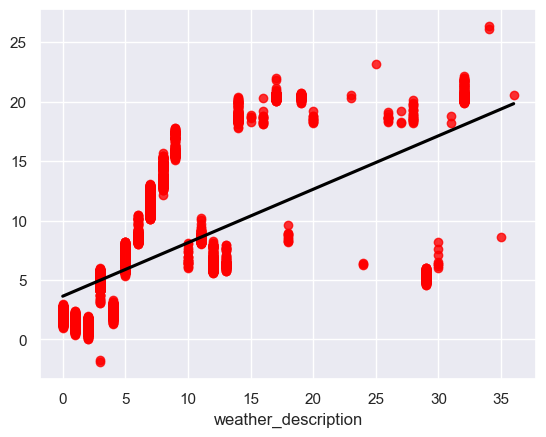

In [57]:
sns.regplot(x=y_test,y=y_pred_regression,ci=None,color ='red',line_kws={"color": "black"});

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [59]:
mean_absolute_error(y_test,y_pred)

3.696960920883856

In [60]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.985047931948131

In [61]:
df['temp'].describe()

count    48204.000000
mean       281.209736
std         13.331395
min          0.000000
25%        272.187500
50%        282.430000
75%        291.800000
max        310.070000
Name: temp, dtype: float64

# Visualizing the result for Polynomial Regression

In [62]:
# using the Polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

In [63]:
poly_reg=PolynomialFeatures(degree=2)
poly_reg.fit(x_train)


PolynomialFeatures()

In [64]:
x_train_poly=poly_reg.transform(x_train)
x_test_poly=poly_reg.transform(x_test)

In [65]:
x_train_poly.shape, x_test_poly.shape

((38563, 28), (9641, 28))

In [66]:
lr=LinearRegression()

lr.fit(x_train_poly, y_train)

LinearRegression()

In [67]:
lr.score(x_test_poly, y_test)

0.5433186810924355

In [68]:
lr.predict([x_test_poly[0,:]])

array([15.1419705])

In [69]:
# y_pred=lr.predict(x_test_poly)
y_pred

array([17.75830638,  4.98969551,  2.13569782, ...,  2.61284692,
        0.99040385,  6.90438754])

In [70]:
y_test

35748     9
147       3
24362     0
35495    28
11010     7
         ..
6401     16
34004     3
46086     4
42579     2
23709    12
Name: weather_description, Length: 9641, dtype: int64

# Implementing Ridge and Lasso Regression

In [71]:
from sklearn.linear_model import Ridge, Lasso

In [72]:
rd = Ridge()

rd.fit(x_train,y_train)

Ridge()

In [73]:
rd.score(x_test,y_test)

0.44754457445233176

In [74]:
ls = Lasso()

ls.fit(x_train,y_train)

ls.score(x_test,y_test)

0.44368550055208467

In [75]:
rd2 = Ridge(alpha=2)

rd2.fit(x_train,y_train)

rd2.score(x_test,y_test)

0.44754456591411496

In [76]:
ls2 = Lasso(alpha=2)

ls2.fit(x_train,y_train)

ls2.score(x_test,y_test)

0.4329673540004665

# Decision Tree Regression - ML Model Training

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
regressor = DecisionTreeRegressor(criterion='squared_error')

regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [79]:
y_pred=regressor.predict(x_test)
print(y_test)

35748     9
147       3
24362     0
35495    28
11010     7
         ..
6401     16
34004     3
46086     4
42579     2
23709    12
Name: weather_description, Length: 9641, dtype: int64


In [80]:
regressor.predict(x_test)

array([9., 3., 0., ..., 4., 2., 5.])

In [81]:
regressor.score(x_test,y_test)

0.8622312326074859

In [82]:
x_test.iloc[-1,:]

traffic_volume    910.00
holiday             0.00
temp              289.19
rain_1h             0.00
clouds_all         40.00
weather_main        2.00
Name: 23709, dtype: float64

In [83]:
regressor.predict([x_test.iloc[-1,:]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([5.])

In [84]:
y_test.iloc[-1]

12

In [85]:
pred=regressor.predict(x_test)
pred

array([9., 3., 0., ..., 4., 2., 5.])

In [86]:
y_test

35748     9
147       3
24362     0
35495    28
11010     7
         ..
6401     16
34004     3
46086     4
42579     2
23709    12
Name: weather_description, Length: 9641, dtype: int64

# Using MAE,MSE,RMSE and R_squared 

In [87]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [88]:
print("MAE",mean_absolute_error(y_test,y_pred))
#using MAE for how close are the predict values are to the actual values in data set

MAE 0.8457801749472739


In [89]:
print("MSE",mean_squared_error(y_test,y_pred))


MSE 8.932824511058097


In [90]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 2.988783115426427


In [91]:
from sklearn.metrics import r2_score

In [92]:
print("R_squared",r2_score(y_test,y_pred))

R_squared 0.8622312326074859


# Random Forest Regressor

 It can handle high-dimensional data, missing values, outliers, and non-linear relationships well. 

In [93]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=5)
regressor.fit(x_train,y_train)
regressor=RandomForestRegressor(n_estimators=5)

In [94]:
regressor=RandomForestRegressor(n_estimators=5)
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=5)

In [95]:
y_pred=regression.predict(x_test)
y_pred

array([17.75830638,  4.98969551,  2.13569782, ...,  2.61284692,
        0.99040385,  6.90438754])

In [96]:
regressor.score(x_test,y_test)

0.9069887544059958

In [97]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [98]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 3.696960920883856


In [99]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 35.820798747716594


In [100]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 5.985047931948131


In [101]:
from sklearn.metrics import r2_score

In [102]:
print("R_squared",r2_score(y_test,y_pred))

R_squared 0.44754458297270694
